# CS5446 Warehouse Robot (Modular Helpers)
使用拆分后的 py 模块，让 Notebook 只专注于实验流程。

In [1]:
from rddl_utils import (
    summarize_file, pretty_domain, pretty_instance, pretty_nonfluents, print_state_action_overview
)
from grid_planning import (
    build_grid, plot_grid, astar, path_to_actions, plot_path, plot_staged_path,
    single_agent_demo, multi_agent_demo, auto_pick_starts_goals,
    multi_agent_sequential, plot_multiple_paths_pretty_offset, evaluate_multi_agent
)
from pickplace_utils import (
    parse_pick_drop_from_nonfluent_text, parse_start_from_instance_text, validate_or_fallback,
    plan_pick_and_drop, plot_pickdrop_offset, animate_pickdrop_gif_offset,
    plot_pickdrop_offset_smooth, animate_pickdrop_smooth_gif, astar_with_footprint,
    plot_explored_heatmap, plot_heuristic_field
)
from rddl_utils import read_text
from custom_layouts import make_enhanced_nonfl, ascii_preview


In [2]:
FILENAMES = {
    'domain': 'warehouse_domain_formal.rddl',
    'instance': 'warehouse_instance_6x6_formal.rddl',
    'nonfl_clear': 'warehouse_nonfluents_6x6_clear_formal.rddl',
    'nonfl_shelf': 'warehouse_nonfluents_6x6_shelves_formal.rddl',
}

NEW_FILES = {
    'domain': 'warehouse_pickplace_domain.rddl',
    'nonfl': 'warehouse_pickplace_nonfluents_15x10.rddl',
    'instance': 'warehouse_pickplace_instance_15x10.rddl',
}


In [3]:
kind_dom, dom = summarize_file(FILENAMES['domain'])
kind_inst, inst = summarize_file(FILENAMES['instance'])
kind_clr, nfl_clear = summarize_file(FILENAMES['nonfl_clear'])
kind_shf, nfl_shelf = summarize_file(FILENAMES['nonfl_shelf'])

print('='*80); print('[Domain]'); print('='*80)
pretty_domain(dom)

print('='*80); print('[Instance]'); print('='*80)
pretty_instance(inst)

print('='*80); print('[Non-fluents] CLEAR'); print('='*80)
pretty_nonfluents(nfl_clear, 'CLEAR')

print('='*80); print('[Non-fluents] SHELVES'); print('='*80)
pretty_nonfluents(nfl_shelf, 'SHELVES')

print_state_action_overview(dom, nfl_clear, 'CLEAR')
print_state_action_overview(dom, nfl_shelf, 'SHELVES')


[Domain]
Domain name: warehouse_grid_mdp
Types: pos
State fluents (2): ['agent_x', 'agent_y']
Action fluents (4): ['move_east', 'move_north', 'move_south', 'move_west']
Has reward: True | CPFs (rough count): 2
[Instance]
Instance name: warehouse_inst_6x6
Domain ref: warehouse_grid_mdp
Non-fluents ref: warehouse_6x6_shelves
Horizon: 200  Discount: 1.0  MaxNondefActions: 1
Init-state:
  - agent_x = 0
  - agent_y = 0
Parsed start (agent_x, agent_y): (0, 0)
[Non-fluents] CLEAR
Non-fluents name: warehouse_6x6_clear (CLEAR)
Domain ref: warehouse_grid_mdp
Objects:
  - pos: {0..5
H x W = 6 x 6 | Goal = (5, 5)
Obstacles: 0
[Non-fluents] SHELVES
Non-fluents name: warehouse_6x6_shelves (SHELVES)
Domain ref: warehouse_grid_mdp
Objects:
  - pos: {0..5
H x W = 6 x 6 | Goal = (5, 5)
Obstacles: 12
Sample obstacles (first 10): [(1, 0), (1, 1), (1, 3), (1, 4), (2, 4), (3, 1), (3, 2), (3, 4), (5, 1), (5, 2)]

--------------------------------------------------------------------------------
[State & Action

Start (from instance): (0, 0)
Goal (CLEAR): (5, 5)
Goal (SHELVES): (5, 5)


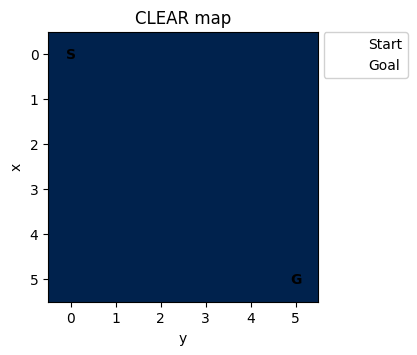

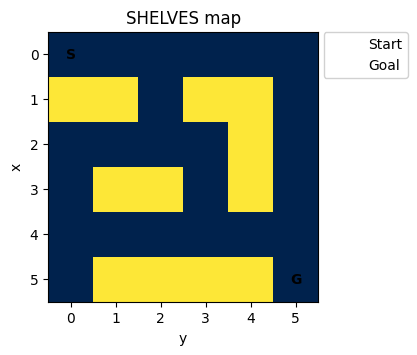

In [4]:
start_xy = inst.get('init_agent_xy')
print('Start (from instance):', start_xy)
print('Goal (CLEAR):', (nfl_clear.get('GOAL_X'), nfl_clear.get('GOAL_Y')))
print('Goal (SHELVES):', (nfl_shelf.get('GOAL_X'), nfl_shelf.get('GOAL_Y')))
plot_grid(nfl_clear, start_xy, title='CLEAR map')
plot_grid(nfl_shelf, start_xy, title='SHELVES map')


=== CLEAR map ===
[Single-agent]
start: (0, 0) goal: (5, 5) path_len: 10
actions: ['E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S']


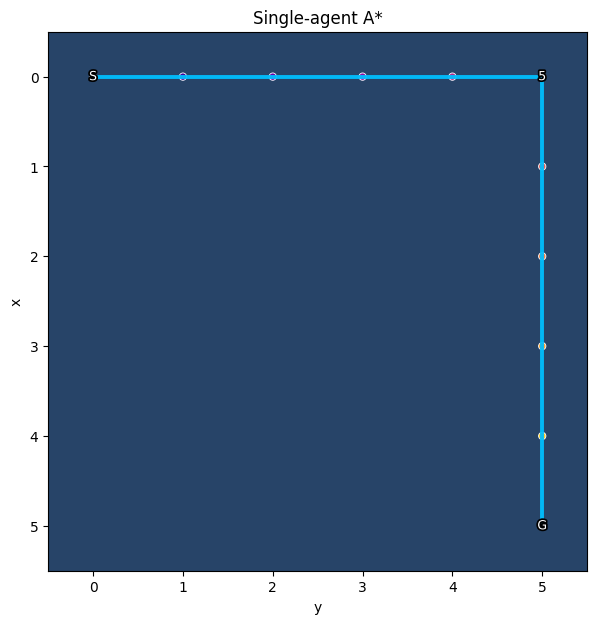

=== SHELVES map ===
[Single-agent]
start: (0, 0) goal: (5, 5) path_len: 10
actions: ['E', 'E', 'E', 'E', 'E', 'S', 'S', 'S', 'S', 'S']


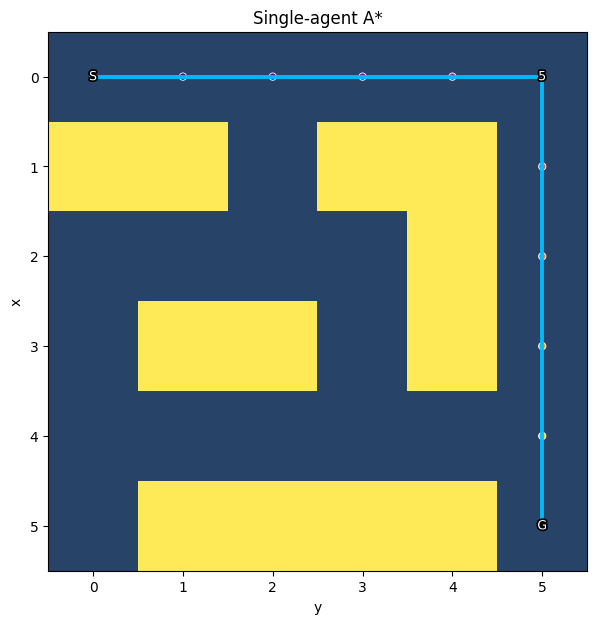

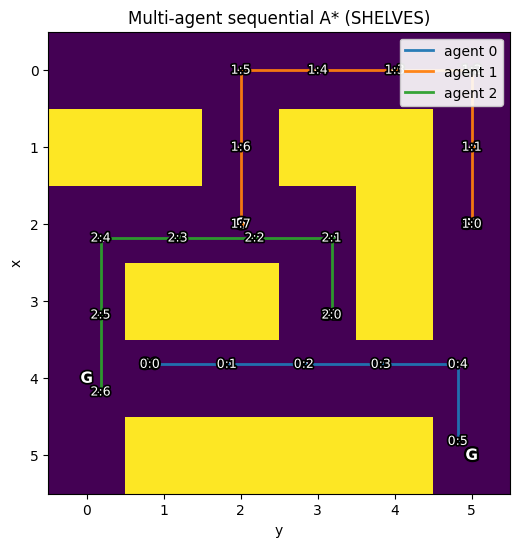

Multi-agent metrics: {'avg_len': 6.0, 'success_rate': 1.0, 'vertex_conflicts': 0, 'lengths': [5, 7, 6], 'successes': [True, True, True]}


In [5]:
print('=== CLEAR map ===')
single_agent_demo(nfl_clear, inst)

print('=== SHELVES map ===')
single_agent_demo(nfl_shelf, inst)

grid_sh = build_grid(nfl_shelf)
starts, goals = auto_pick_starts_goals(nfl_shelf, k=3, seed=13)
plans = multi_agent_sequential(grid_sh, starts, goals, t_max=256)
plot_multiple_paths_pretty_offset(nfl_shelf, plans, starts=starts, goals=goals, title='Multi-agent sequential A* (SHELVES)')
metrics = evaluate_multi_agent(grid_sh, starts, goals, plans)
print('Multi-agent metrics:', metrics)


[Pick&Place Domain]
Domain name: warehouse_pickplace
Types: pos
State fluents (4): ['agent_x', 'agent_y', 'carry', 'delivered']
Action fluents (4): ['move_east', 'move_north', 'move_south', 'move_west']
Has reward: True | CPFs (rough count): 4
[Pick&Place Non-fluents]
Non-fluents name: pp_nf_15x10_basic (Pick&Place)
Domain ref: warehouse_pickplace
Objects:
  - pos: {0..14
H x W = 15 x 10 | Goal = (None, None)
Obstacles: 12
Sample obstacles (first 10): [(1, 4), (1, 5), (4, 4), (5, 4), (6, 4), (8, 2), (8, 3), (8, 4), (8, 5), (10, 6)]
[Pick&Place Instance]
Instance name: pp_inst_15x10
Domain ref: warehouse_pickplace
Non-fluents ref: pp_nf_15x10_basic
Horizon: 400  Discount: 1.0  MaxNondefActions: 1
Init-state:
  - agent_x = 1
  - agent_y = 1
  - carry = false
  - delivered = false
Parsed start (agent_x, agent_y): (1, 1)

--------------------------------------------------------------------------------
[State & Action overview] Map = 15x10 pick&place
- State (vector view): dim = 4 | variabl

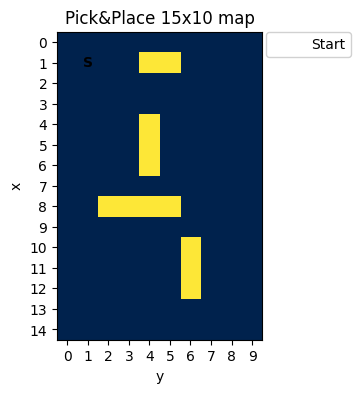

In [6]:
kind_d2, dom2 = summarize_file(NEW_FILES['domain'])
kind_nf2, nf2 = summarize_file(NEW_FILES['nonfl'])
kind_ins2, ins2 = summarize_file(NEW_FILES['instance'])

print('='*80); print('[Pick&Place Domain]'); print('='*80)
pretty_domain(dom2)

print('='*80); print('[Pick&Place Non-fluents]'); print('='*80)
pretty_nonfluents(nf2, 'Pick&Place')

print('='*80); print('[Pick&Place Instance]'); print('='*80)
pretty_instance(ins2)

print_state_action_overview(dom2, nf2, '15x10 pick&place')
plot_grid(nf2, start_xy=ins2.get('init_agent_xy'), title='Pick&Place 15x10 map')


[Pick&Place] start=(1, 1), pick=(1, 1), drop=(1, 1)
Phase-1 length: 0
Phase-2 length: 0


/content/pickplace_utils.py:157: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right", framealpha=0.9)


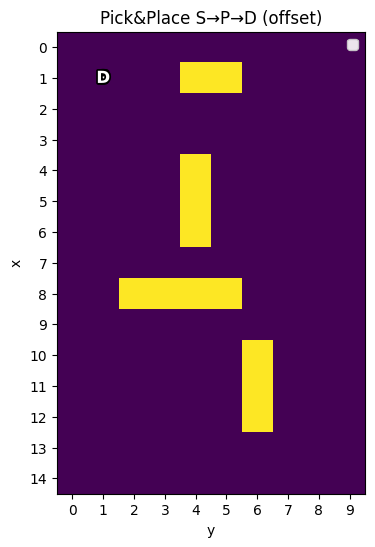

/content/pickplace_utils.py:298: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right", framealpha=0.9)


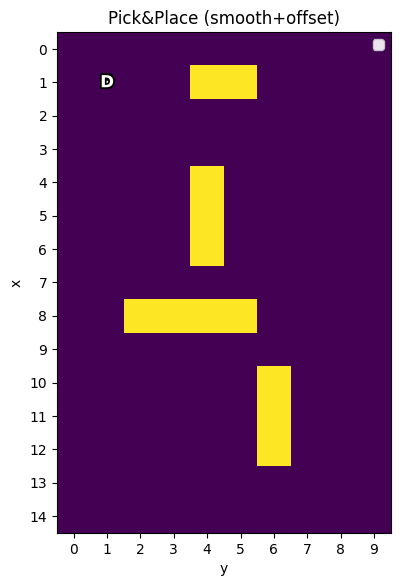

Saved GIF to: pickplace_15x10_offset.gif
Saved GIF to: pickplace_15x10_smooth.gif


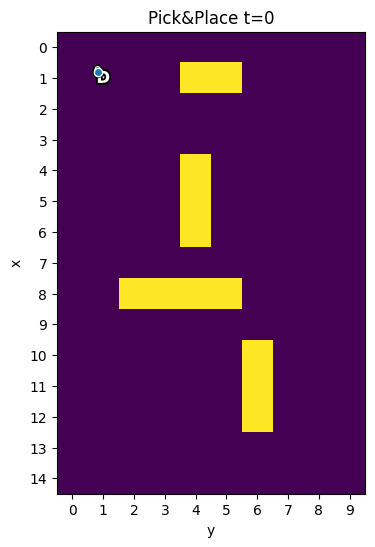

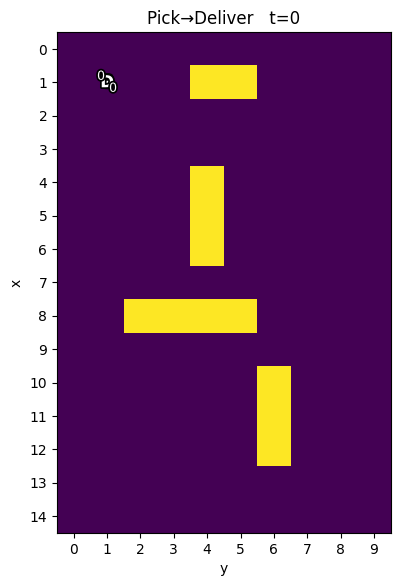

In [7]:
nf_text = read_text(NEW_FILES['nonfl'])
ins_text = read_text(NEW_FILES['instance'])
start_xy = parse_start_from_instance_text(ins_text) or ins2.get('init_agent_xy')
start_xy = validate_or_fallback(nf2, start_xy)
pick_set, drop_set = parse_pick_drop_from_nonfluent_text(nf_text)
if not pick_set:
    pick_set = [start_xy]
if not drop_set:
    drop_set = [pick_set[0]]
pick_xy, drop_xy = pick_set[0], drop_set[0]
pick_xy = validate_or_fallback(nf2, pick_xy)
drop_xy = validate_or_fallback(nf2, drop_xy)
print(f'[Pick&Place] start={start_xy}, pick={pick_xy}, drop={drop_xy}')
p1, p2 = plan_pick_and_drop(nf2, start_xy, pick_xy, drop_xy)
print('Phase-1 length:', None if p1 is None else len(p1)-1)
print('Phase-2 length:', None if p2 is None else len(p2)-1)
plot_pickdrop_offset(nf2, p1, p2, start_xy, pick_xy, drop_xy, title='Pick&Place S→P→D (offset)')
plot_pickdrop_offset_smooth(nf2, p1, p2, start_xy, pick_xy, drop_xy, title='Pick&Place (smooth+offset)')
animate_pickdrop_gif_offset(nf2, p1, p2, start_xy, pick_xy, drop_xy, out_gif='pickplace_15x10_offset.gif')
animate_pickdrop_smooth_gif(nf2, p1, p2, start_xy, pick_xy, drop_xy, out_gif='pickplace_15x10_smooth.gif')


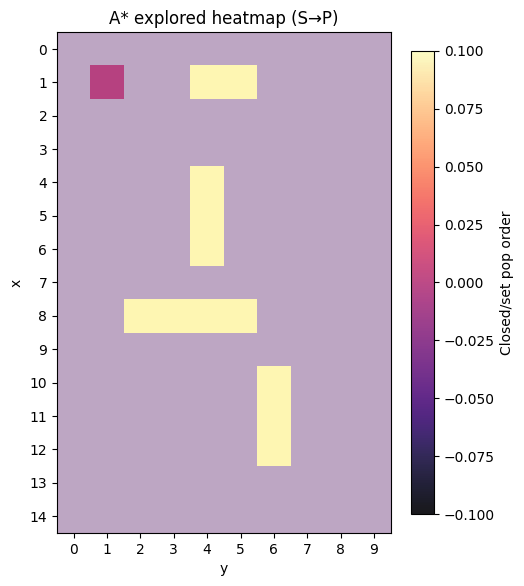

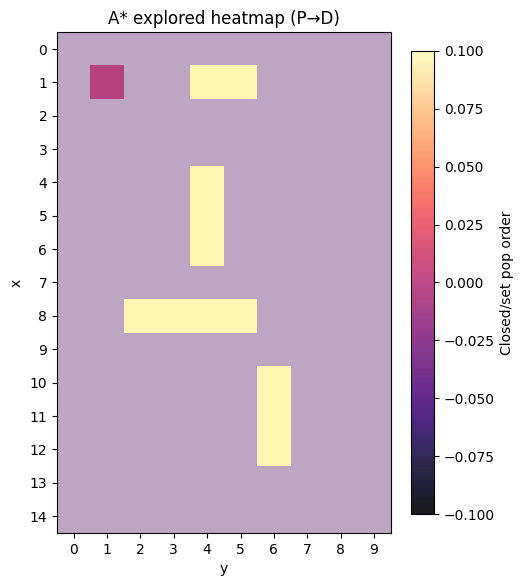

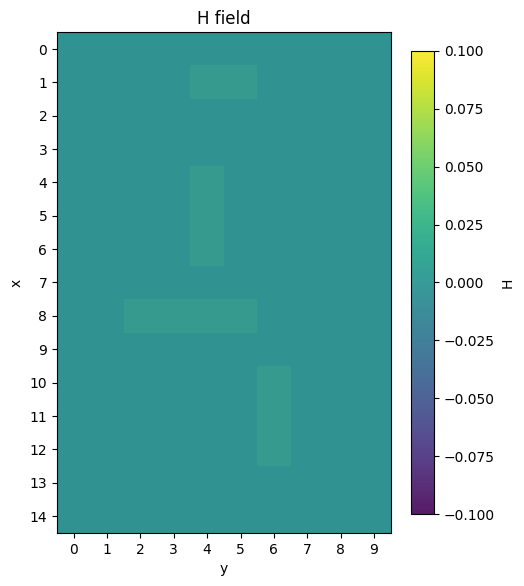

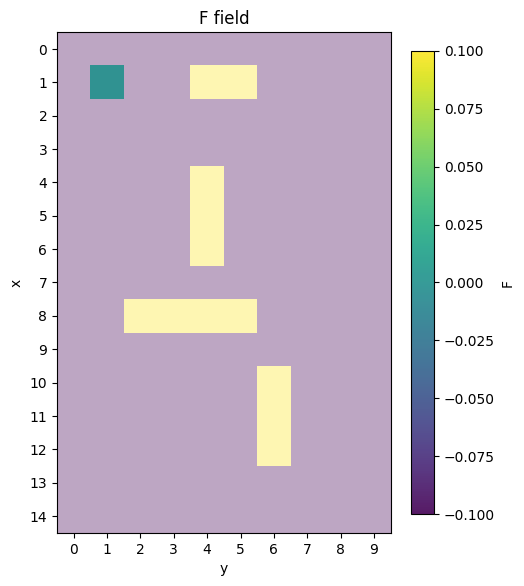

In [8]:
grid = build_grid(nf2)
p1_fp, fp1 = astar_with_footprint(grid, start_xy, pick_xy)
p2_fp, fp2 = astar_with_footprint(grid, pick_xy, drop_xy)
plot_explored_heatmap(nf2, fp1, title='A* explored heatmap (S→P)')
plot_explored_heatmap(nf2, fp2, title='A* explored heatmap (P→D)')
plot_heuristic_field(nf2, fp1, field='h')
plot_heuristic_field(nf2, fp1, field='f')


Legend: .=free, #=shelf, I=inbound, O=outbound, P=packing, C=charging, >=one_way_east, <=one_way_west, ^=one_way_north, v=one_way_south
00 . I I . . . . . . . . . . . .
01 . . . . O > > . . O O . . . .
02 . O # . # . # O . # # ^ . # O
03 . . . . . . . . . . . ^ . . .
04 . P P . # O . . . O # . . . .
05 . . . v . . . . . . . O . . .
06 . O # v # . # O . # # # . # O
07 . . . . O . . . . O O . . . .
08 . . . . . < < . . . . . . C .
09 . . . . . . . . . . . . . . .


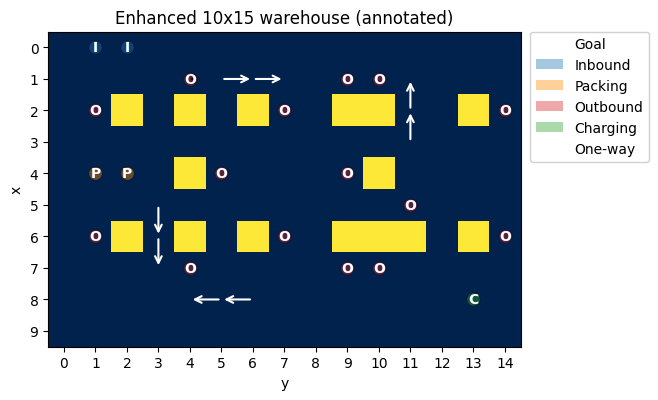

In [9]:
# Enhanced layout visualization with semantic annotations
print(ascii_preview())
enhanced_nonfl = make_enhanced_nonfl()
plot_grid(enhanced_nonfl, title='Enhanced 10x15 warehouse (annotated)', annotate_special=True, figsize=(7,7))

Sequential summary:
{'job': 'Job A', 'start': (0, 1), 'pick': (4, 1), 'drop': (1, 4), 'segments': (4, 6), 'total': 10}
{'job': 'Job C', 'start': (1, 4), 'pick': (4, 2), 'drop': (7, 10), 'segments': (5, 11), 'total': 16}
{'job': 'Job B', 'start': (7, 10), 'pick': (4, 2), 'drop': (4, 9), 'segments': (11, 9), 'total': 20}


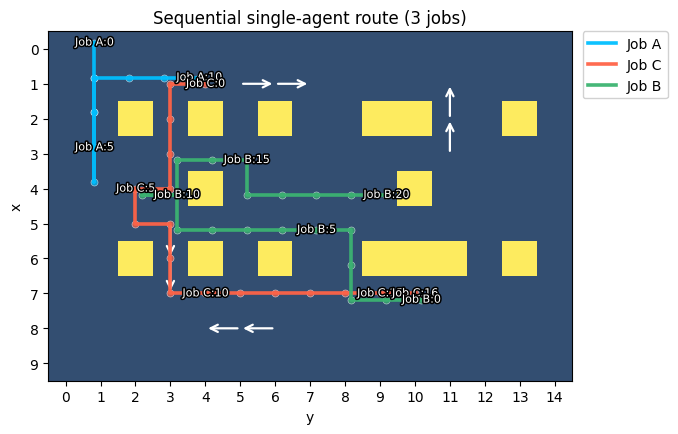


=== Job A ===
Start (0, 1) -> Pick (4, 1) -> Drop (1, 4)


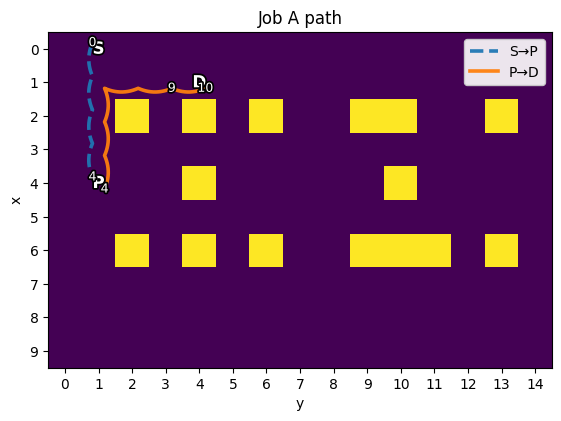

Saved GIF to: sequential_1.gif


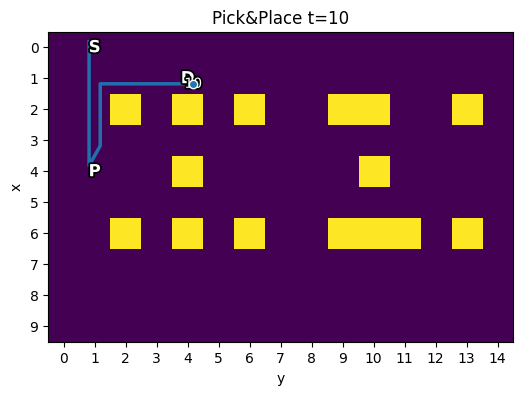

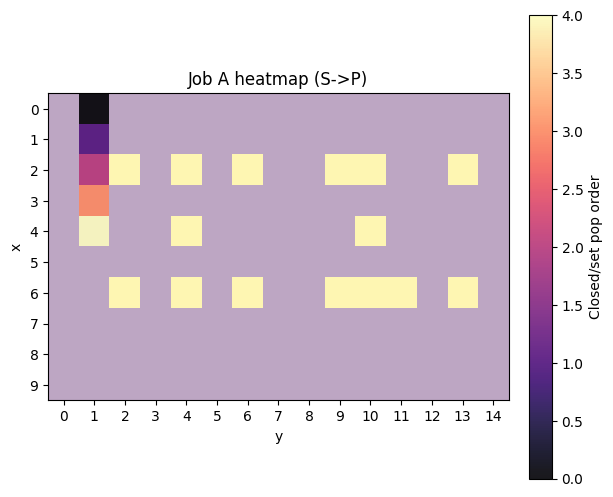

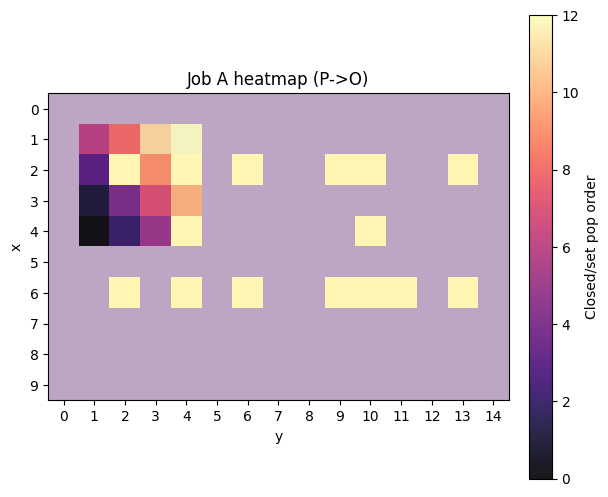


=== Job C ===
Start (1, 4) -> Pick (4, 2) -> Drop (7, 10)


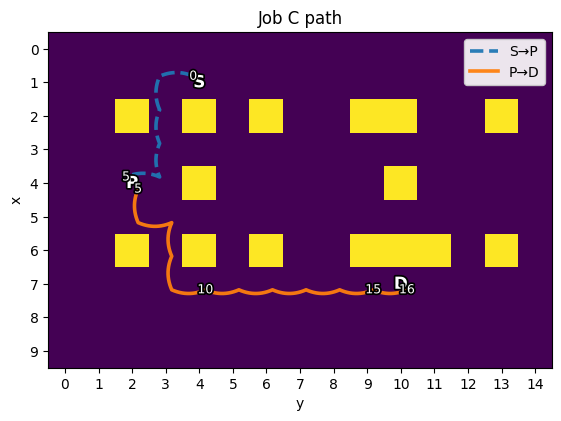

Saved GIF to: sequential_2.gif


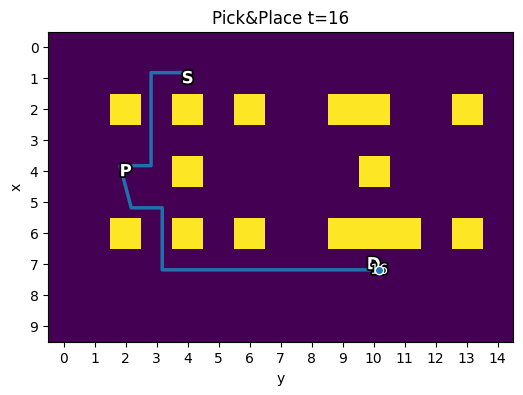

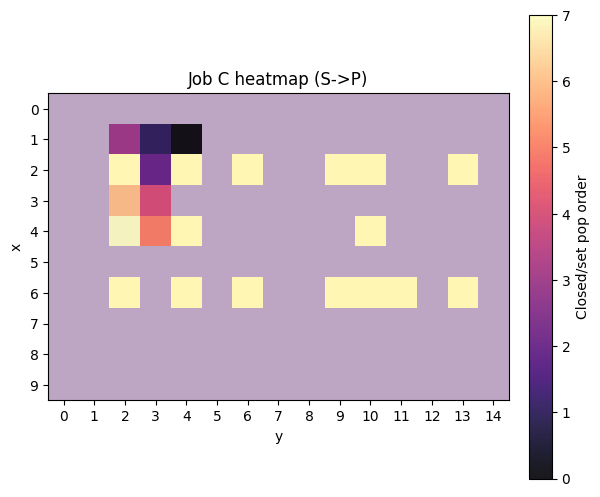

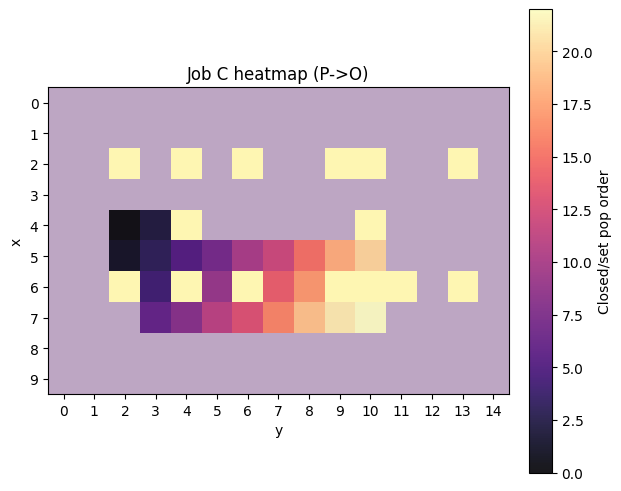


=== Job B ===
Start (7, 10) -> Pick (4, 2) -> Drop (4, 9)


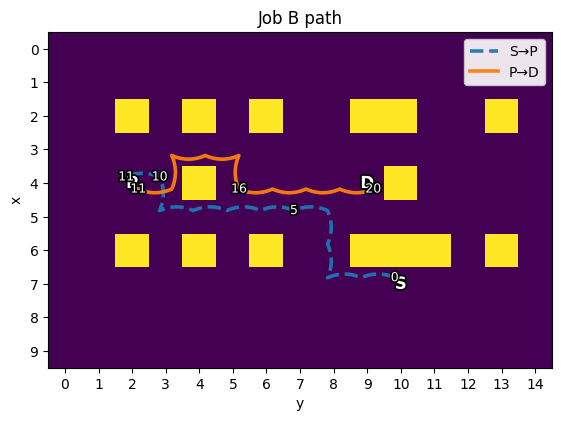

Saved GIF to: sequential_3.gif


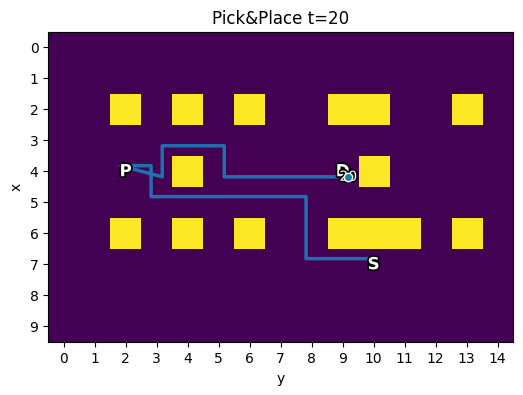

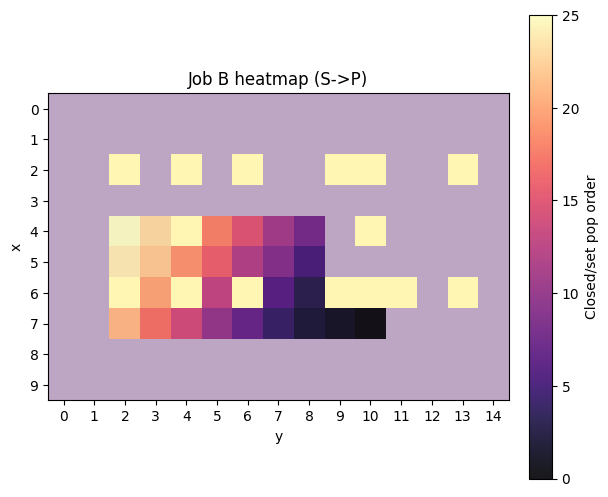

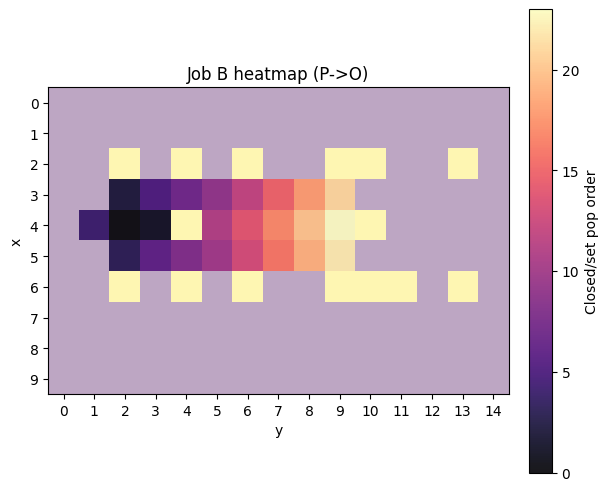

In [11]:
# Sequential execution: agent completes 3 tasks in one run
enhanced_nonfl = make_enhanced_nonfl()
grid = build_grid(enhanced_nonfl)
zones = enhanced_nonfl.get('zones', {})
inbounds = zones.get('inbound', [])
packings = zones.get('packing', [])
outbounds = zones.get('outbound', [])
jobs = [
    {'name': 'Job A', 'pick': packings[0], 'drop': outbounds[0]},
    {'name': 'Job B', 'pick': packings[-1], 'drop': outbounds[-1]},
    {'name': 'Job C', 'pick': packings[min(1, len(packings)-1)], 'drop': outbounds[len(outbounds)//2]},
]
current_pos = inbounds[0]
full_path = [current_pos]
job_records = []
summary = []
for job in jobs:
    pick, drop = job['pick'], job['drop']
    path_sp, fp_sp = astar_with_footprint(grid, current_pos, pick)
    if path_sp is None:
        raise RuntimeError(f"No path {current_pos}->{pick}")
    path_pd, fp_pd = astar_with_footprint(grid, pick, drop)
    if path_pd is None:
        raise RuntimeError(f"No path {pick}->{drop}")
    full_path.extend(path_sp[1:])
    full_path.extend(path_pd[1:])
    seg1 = len(path_sp) - 1
    seg2 = len(path_pd) - 1
    summary.append({'job': job['name'], 'start': current_pos, 'pick': pick, 'drop': drop, 'segments': (seg1, seg2), 'total': seg1 + seg2})
    job_records.append({
        'job': job['name'],
        'start': current_pos,
        'pick': pick,
        'drop': drop,
        'path_sp': path_sp,
        'path_pd': path_pd,
        'fp_sp': fp_sp,
        'fp_pd': fp_pd,
    })
    current_pos = drop

print('Sequential summary:')
for row in summary:
    print(row)

colors = ['deepskyblue', 'tomato', 'mediumseagreen']
offsets = [(-0.18, -0.18), (0.0, 0.0), (0.18, 0.18)]
segments = []
for idx, rec in enumerate(job_records):
    combined = rec['path_sp'] + rec['path_pd'][1:]
    segments.append({
        'label': rec['job'],
        'path': combined,
        'color': colors[idx % len(colors)],
        'offset': offsets[idx % len(offsets)],
    })

plot_staged_path(
    enhanced_nonfl,
    segments,
    title='Sequential single-agent route (3 jobs)',
    annotate_every=5
)

for idx, rec in enumerate(job_records, 1):
    print(f"\n=== {rec['job']} ===")
    print(f"Start {rec['start']} -> Pick {rec['pick']} -> Drop {rec['drop']}")
    plot_pickdrop_offset_smooth(
        enhanced_nonfl,
        rec['path_sp'],
        rec['path_pd'],
        start_xy=rec['start'],
        pick_xy=rec['pick'],
        drop_xy=rec['drop'],
        title=f"{rec['job']} path"
    )
    animate_pickdrop_gif_offset(
        enhanced_nonfl,
        rec['path_sp'],
        rec['path_pd'],
        start_xy=rec['start'],
        pick_xy=rec['pick'],
        drop_xy=rec['drop'],
        out_gif=f"sequential_{idx}.gif",
        fps=2
    )
    plot_explored_heatmap(enhanced_nonfl, rec['fp_sp'], title=f"{rec['job']} heatmap (S->P)")
    plot_explored_heatmap(enhanced_nonfl, rec['fp_pd'], title=f"{rec['job']} heatmap (P->O)")
